In [106]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from IPython.display import display
from google.colab import files
import scipy.stats as stats
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from math import pi
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression


In [33]:
# 导入数据
product_data = pd.read_csv('/content/Product_Data.csv')
survey_data = pd.read_csv('/content/Survey_Data.csv')

# 查看数据的基本信息
print("Product Data Info:")
print(product_data.info())

print("\nSurvey Data Info:")
print(survey_data.info())

# 检查是否有缺失值
print("\nMissing Values in Product Data:")
print(product_data.isnull().sum())

print("\nMissing Values in Survey Data:")
print(survey_data.isnull().sum())

# 检查是否有重复行
print("\nDuplicate Rows in Product Data:", product_data.duplicated().sum())
print("Duplicate Rows in Survey Data:", survey_data.duplicated().sum())


Product Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 35 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Brand                                   100 non-null    object 
 1   Model                                   100 non-null    object 
 2   Accuracy                                100 non-null    int64  
 3   Ease of Use                             100 non-null    int64  
 4   Cost of Consumables                     100 non-null    int64  
 5   Alert Features                          100 non-null    int64  
 6   Healthcare Provider Recommendations     100 non-null    int64  
 7   Insurance Coverage                      100 non-null    int64  
 8   Speed of Measurement                    100 non-null    int64  
 9   Compatibility with Mobile Apps          100 non-null    int64  
 10  Real-time Monitoring                    100 

In [34]:
columns_to_remove = ['City', 'Name', 'Age', 'Occupation', 'GP Name']
survey_data = survey_data.drop(columns=columns_to_remove)

In [35]:
# 计算偏度和峰度
skewness = survey_data.skew()
kurtosis = survey_data.kurt()

skewness, kurtosis

(Participant ID                            0.000000
 Accuracy                                 -0.488267
 Ease of Use                              -0.366252
 Cost of Consumables                      -0.438479
 Alert Features                           -0.460026
 Healthcare Provider Recommendations      -0.455705
 Insurance Coverage                       -0.427761
 Price                                    -0.434188
 Speed of Measurement                     -0.397932
 Compatibility with Mobile Apps           -0.470856
 Real-time Monitoring                     -0.494823
 Portability                              -0.026022
 Connectivity                             -0.002002
 User Support and Customer Service        -0.042041
 Frequency of Calibration Required         0.040038
 Integration with Other Health Devices    -0.012009
 Ease of Sensor/Application Replacement    0.038035
 Customer Reviews and Ratings             -0.028024
 Warranty and Return Policy                0.023053
 Battery Lif

In [36]:
survey_data = survey_data.fillna(survey_data.mean())

In [37]:
print("\nMissing Values in Survey Data:")
print(survey_data.isnull().sum())


Missing Values in Survey Data:
Participant ID                            0
Accuracy                                  0
Ease of Use                               0
Cost of Consumables                       0
Alert Features                            0
Healthcare Provider Recommendations       0
Insurance Coverage                        0
Price                                     0
Speed of Measurement                      0
Compatibility with Mobile Apps            0
Real-time Monitoring                      0
Portability                               0
Connectivity                              0
User Support and Customer Service         0
Frequency of Calibration Required         0
Integration with Other Health Devices     0
Ease of Sensor/Application Replacement    0
Customer Reviews and Ratings              0
Warranty and Return Policy                0
Battery Life                              0
Brand Reputation                          0
Customer Training and Education           0


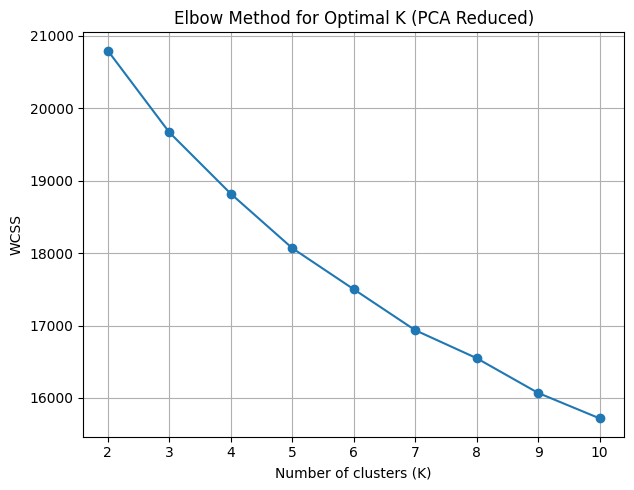

In [41]:
# Load your data
feature_columns = [col for col in survey_data.columns if col not in ['Participant ID', 'Price']]
survey_features = survey_data[feature_columns]

# Select only numeric columns for clustering
numeric_data = survey_features.select_dtypes(include='number')

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Apply PCA to reduce dimensions while maintaining most variance
pca = PCA(n_components=10)  # You can adjust the number of components as needed
reduced_data = pca.fit_transform(scaled_data)

# Define the range for K values to test
k_values = range(2, 11)

# Plot the Elbow method graph
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method for Optimal K (PCA Reduced)')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()


In [42]:
# 选择用于聚类的特征（除了Price和Participant ID）
feature_columns = [col for col in survey_data.columns if col not in ['Participant ID', 'Price']]
survey_features = survey_data[feature_columns]

# 标准化调查数据
scaler = StandardScaler()
scaled_survey_features = scaler.fit_transform(survey_features)

# 使用K-means进行聚类
optimal_k = 2  # 适当聚类数，根据实际数据情况调整
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
survey_data['Cluster'] = kmeans.fit_predict(scaled_survey_features)

# 获取聚类中心并转换为DataFrame
cluster_centers = kmeans.cluster_centers_
cluster_centers_df = pd.DataFrame(cluster_centers, columns=feature_columns)

# 应用聚类中心到产品数据
# 这里仅使用存在于product_data中的特征进行加权
for i in range(optimal_k):
    cluster_center = cluster_centers_df.iloc[i]
    for feature in feature_columns:
        if feature in product_data.columns:
            product_data[f'Cluster_{i}_{feature}'] = product_data[feature] * cluster_center[feature]

# 查看加权后的产品数据
print(product_data.head())
cluster_centers_df

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


      Brand              Model  Accuracy  Ease of Use  Cost of Consumables  \
0  OneTouch         Verio Flex         8            9                    6   
1  OneTouch         Verio Flex         8           10                    6   
2    Abbott  Freestyle Libre 2         7            8                   10   
3   iHealth              Smart        10            9                    6   
4   iHealth              Smart         9            8                    7   

   Alert Features  Healthcare Provider Recommendations  Insurance Coverage  \
0               8                                    6                   8   
1              10                                    8                   8   
2               6                                    9                  10   
3              10                                    7                  10   
4              10                                   10                  10   

   Speed of Measurement  Compatibility with Mobile Apps  ...  

,Accuracy,Ease of Use,Cost of Consumables,Alert Features,Healthcare Provider Recommendations,Insurance Coverage,Speed of Measurement,Compatibility with Mobile Apps,Real-time Monitoring,Portability,...,Trend Analysis Features,Ease of Data Interpretation,Environmental Impact,Customization Options,Blood Sample Size Required,Data Storage Capacity,Display Quality,Comprehensive Health Data Analysis,Durability,Availability and Accessibility
0,0.024435,0.017082,0.017167,-0.066858,-0.034038,-0.049248,0.020172,-0.002288,0.029596,-0.017997,...,0.002001,-0.99875,-0.000969,0.007019,-0.027993,0.029961,0.016963,-0.001970,-0.016976,-0.006003
1,-0.024484,-0.017116,-0.017201,0.066992,0.034106,0.049347,-0.020213,0.002292,-0.029656,0.018033,...,-0.002005,1.00075,0.000971,-0.007033,0.028049,-0.030021,-0.016997,0.001974,0.017010,0.006015


In [43]:
# 显示加权后的产品数据的前10行
display(product_data.head(10))

,Brand,Model,Accuracy,Ease of Use,Cost of Consumables,Alert Features,Healthcare Provider Recommendations,Insurance Coverage,Speed of Measurement,Compatibility with Mobile Apps,...,Cluster_1_Trend Analysis Features,Cluster_1_Ease of Data Interpretation,Cluster_1_Environmental Impact,Cluster_1_Customization Options,Cluster_1_Blood Sample Size Required,Cluster_1_Data Storage Capacity,Cluster_1_Display Quality,Cluster_1_Comprehensive Health Data Analysis,Cluster_1_Durability,Cluster_1_Availability and Accessibility
0,OneTouch,Verio Flex,8,9,6,8,6,8,10,8,...,-0.020050,10.007496,0.009714,-0.070331,0.252442,-0.210146,-0.169967,0.019738,0.136076,0.060153
1,OneTouch,Verio Flex,8,10,6,10,8,8,10,8,...,-0.016040,8.005997,0.009714,-0.063298,0.280491,-0.180125,-0.152971,0.017764,0.170096,0.060153
2,Abbott,Freestyle Libre 2,7,8,10,6,9,10,9,6,...,-0.020050,7.005247,0.005828,-0.070331,0.280491,-0.270188,-0.169967,0.015790,0.170096,0.054137
3,iHealth,Smart,10,9,6,10,7,10,8,6,...,-0.018045,9.006746,0.008743,-0.042198,0.252442,-0.300208,-0.118977,0.019738,0.170096,0.060153
4,iHealth,Smart,9,8,7,10,10,10,7,9,...,-0.018045,10.007496,0.008743,-0.063298,0.280491,-0.240167,-0.101980,0.013817,0.136076,0.042107
5,Senseonics,Eversense,8,9,6,10,7,7,9,6,...,-0.020050,7.005247,0.008743,-0.070331,0.280491,-0.300208,-0.101980,0.019738,0.153086,0.060153
6,Medtronic,Guardian Connect,8,8,10,7,8,8,9,6,...,-0.018045,8.005997,0.008743,-0.063298,0.224393,-0.210146,-0.152971,0.019738,0.170096,0.060153
7,iHealth,Smart,8,8,10,7,10,8,10,9,...,-0.018045,10.007496,0.009714,-0.049231,0.280491,-0.180125,-0.152971,0.013817,0.136076,0.036092
8,Medtronic,Guardian Connect,9,6,10,9,10,6,9,10,...,-0.016040,6.004498,0.006800,-0.056264,0.224393,-0.270188,-0.118977,0.013817,0.170096,0.060153
9,Dexcom,G6,10,9,6,8,7,9,10,8,...,-0.020050,9.006746,0.005828,-0.070331,0.252442,-0.210146,-0.118977,0.017764,0.102057,0.048122


In [ ]:
print("Product data columns:", product_data.columns.tolist())

Product data columns: ['Brand', 'Model', 'Accuracy', 'Ease of Use', 'Cost of Consumables', 'Alert Features', 'Healthcare Provider Recommendations', 'Insurance Coverage', 'Speed of Measurement', 'Compatibility with Mobile Apps', 'Real-time Monitoring', 'Portability', 'Connectivity', 'User Support and Customer Service', 'Frequency of Calibration Required', 'Integration with Other Health Devices', 'Ease of Sensor/Application Replacement', 'Customer Reviews and Ratings', 'Warranty and Return Policy', 'Battery Life', 'Brand Reputation', 'Trend Analysis Features', 'Blood Sample Size Required', 'Data Storage Capacity', 'Display Quality', 'Comprehensive Health Data Analysis', 'Durability', 'Availability and Accessibility', 'Ease of Data Interpretation', 'Customization Options', 'Environmental Impact', 'Customer Training and Education', 'Price (UK)', 'Sales (UK)', 'Market Share (UK)', 'Cluster_0_Accuracy', 'Cluster_0_Ease of Use', 'Cluster_0_Cost of Consumables', 'Cluster_0_Alert Features', 'Cl

In [44]:
product_data.to_csv('/content/Product_Data_1.csv', index=False)

In [45]:
files.download('Product_Data_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

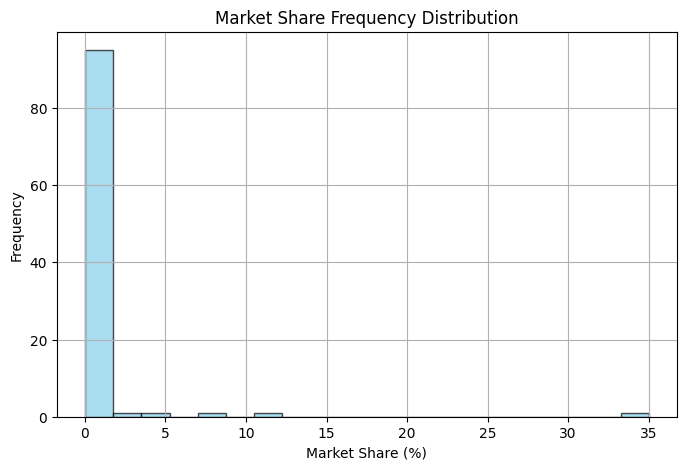

In [46]:
plt.figure(figsize=(8, 5))
plt.hist(product_data['Market Share (UK)'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Market Share Frequency Distribution')
plt.xlabel('Market Share (%)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

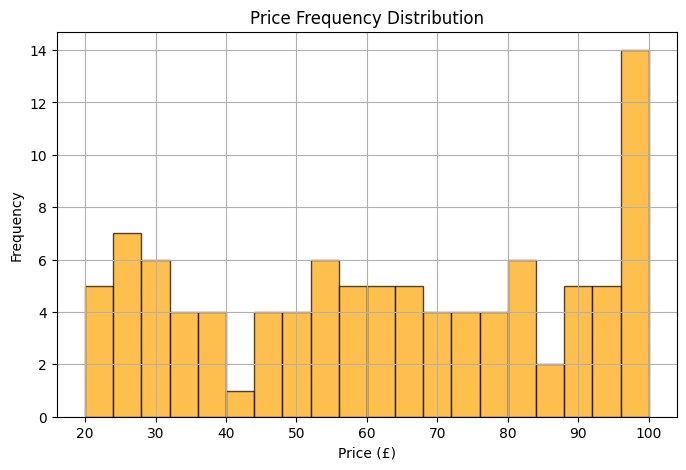

In [47]:
plt.figure(figsize=(8, 5))
plt.hist(product_data['Price (UK)'], bins=20, color='orange', edgecolor='black', alpha=0.7)
plt.title('Price Frequency Distribution')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

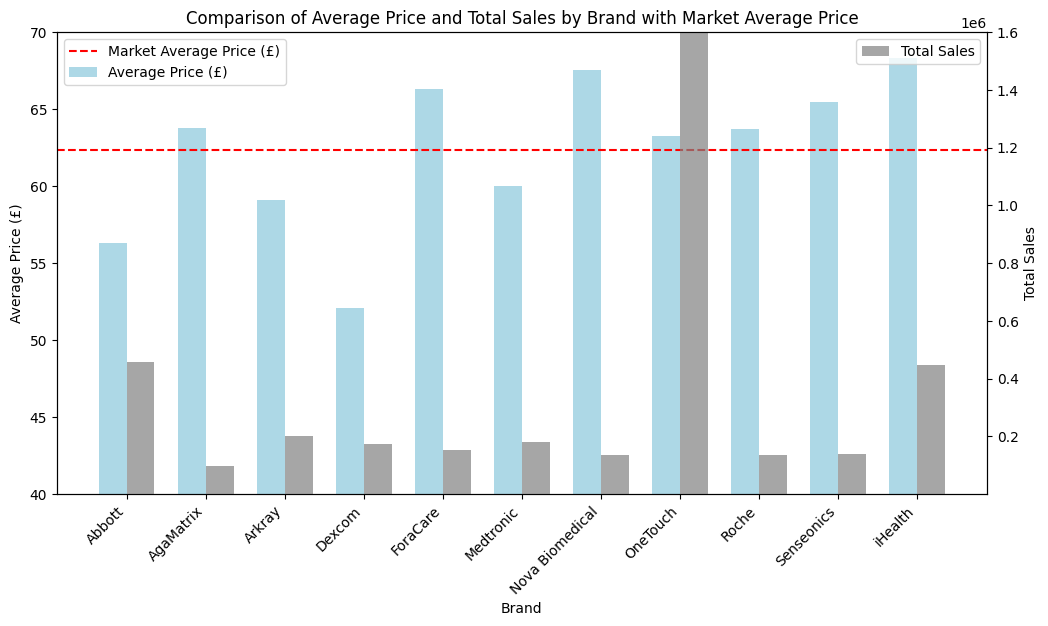

In [55]:
# Grouping the data by 'Brand' and calculating average price and total sales
brand_data = product_data.groupby('Brand').agg({'Price (UK)': 'mean', 'Sales (UK)': 'sum'}).reset_index()

# Calculate the market average price
market_avg_price = product_data['Price (UK)'].mean()

# Set the width of the bars and the offset
bar_width = 0.35
index = np.arange(len(brand_data['Brand']))

# Plotting the comparison of average price and total sales by brand
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting the average price with a slight offset
ax1.bar(index - bar_width/2, brand_data['Price (UK)'], color='lightblue', width=bar_width, label='Average Price (£)', align='center')
ax1.axhline(y=market_avg_price, color='r', linestyle='--', label='Market Average Price (£)')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Average Price (£)')
ax1.set_ylim(40, 70)
ax1.set_xticks(index)
ax1.set_xticklabels(brand_data['Brand'], rotation=45, ha='right')
ax1.legend(loc='upper left')

# Plotting the total sales on the secondary y-axis with a slight offset
ax2 = ax1.twinx()
ax2.bar(index + bar_width/2, brand_data['Sales (UK)'], color='gray', width=bar_width, label='Total Sales', align='center', alpha=0.7)
ax2.set_ylabel('Total Sales')
ax2.set_ylim(300, 1600000)
ax2.legend(loc='upper right')

# Adding a title
plt.title('Comparison of Average Price and Total Sales by Brand with Market Average Price')

plt.show()


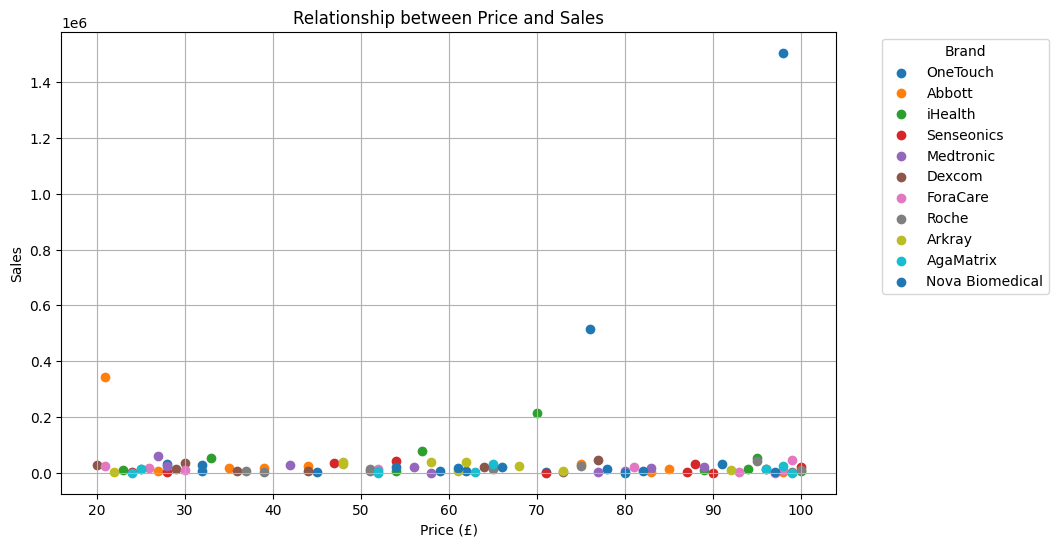

In [56]:

# Generate the scatter plot for the relationship between Price and Sales by Brand
plt.figure(figsize=(10, 6))

# Scatter plot for each brand
for brand in product_data['Brand'].unique():
    subset = product_data[product_data['Brand'] == brand]
    plt.scatter(subset['Price (UK)'], subset['Sales (UK)'], label=brand)

plt.title('Relationship between Price and Sales')
plt.xlabel('Price (£)')
plt.ylabel('Sales')
plt.legend(title='Brand', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


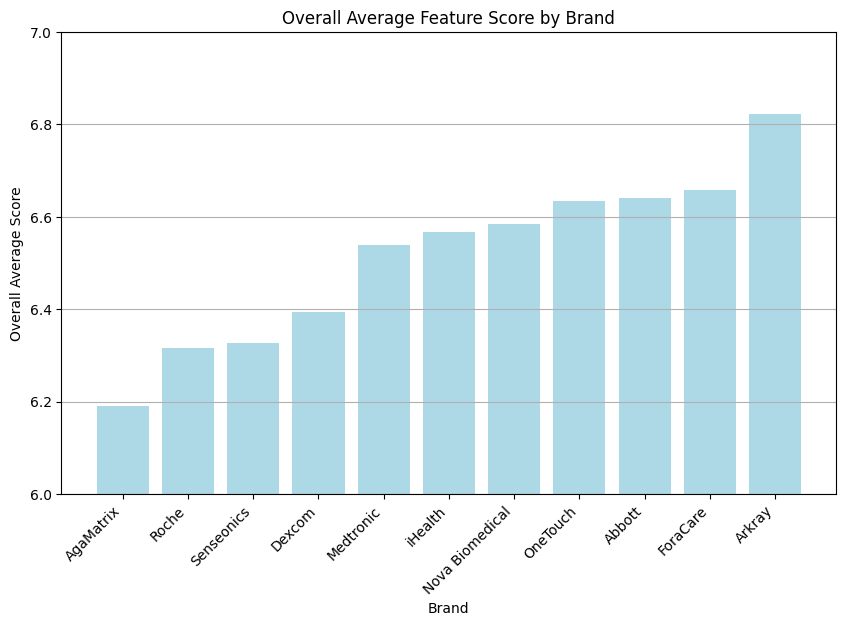

In [58]:

# Calculate the overall average feature score by brand
feature_columns = [col for col in product_data.columns if 'Cluster_' not in col and col not in ['Brand', 'Model', 'Price (UK)', 'Sales (UK)']]
product_data['Overall Average Score'] = product_data[feature_columns].mean(axis=1)

# Group by Brand to get the average score per brand
brand_avg_score = product_data.groupby('Brand')['Overall Average Score'].mean().reset_index()

# Sort the data by the average score
brand_avg_score = brand_avg_score.sort_values(by='Overall Average Score')

# Plotting the overall average feature score by brand
plt.figure(figsize=(10, 6))
plt.bar(brand_avg_score['Brand'], brand_avg_score['Overall Average Score'], color='lightblue')
plt.title('Overall Average Feature Score by Brand')
plt.xlabel('Brand')
plt.ylabel('Overall Average Score')
plt.ylim(6.0, 7.0)
plt.xticks(rotation=45, ha='right')
plt.grid(True, axis='y')
plt.show()


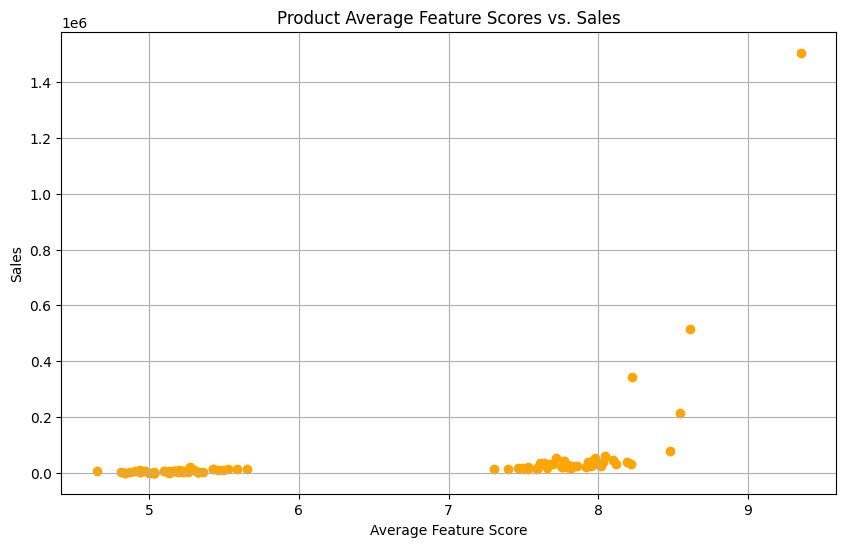

In [62]:
product_data['Product Average Score'] = product_data[feature_columns].mean(axis=1)

# Plotting the scatter plot for Product Average Feature Scores vs. Sales
plt.figure(figsize=(10, 6))
plt.scatter(product_data['Product Average Score'], product_data['Sales (UK)'], color='orange')
plt.title('Product Average Feature Scores vs. Sales')
plt.xlabel('Average Feature Score')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

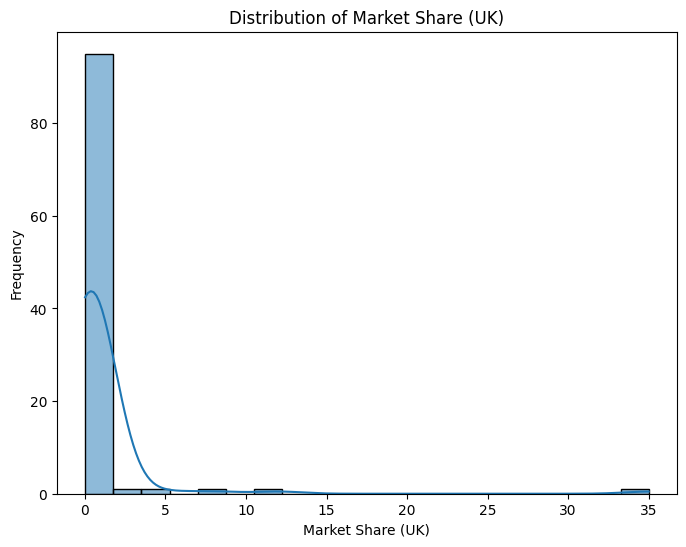

In [ ]:

# 假设目标变量为 Market Share (UK)
plt.figure(figsize=(8, 6))
sns.histplot(product_data['Market Share (UK)'], kde=True, bins=20)
plt.title('Distribution of Market Share (UK)')
plt.xlabel('Market Share (UK)')
plt.ylabel('Frequency')
plt.show()

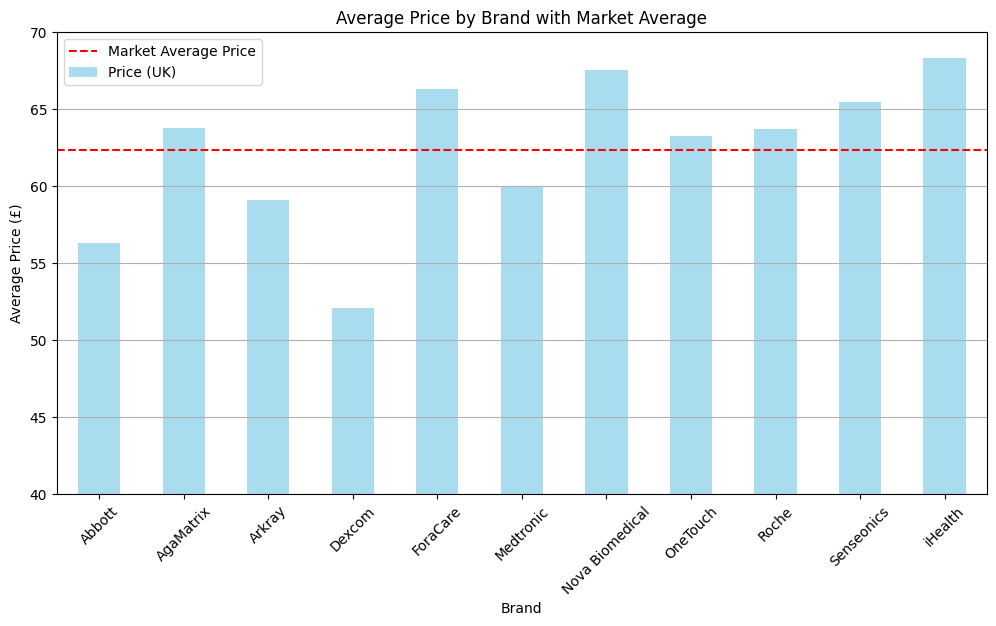

In [ ]:

# Assuming you have the data loaded into a DataFrame named `data`
# Replace with your actual data path
average_price_by_brand = product_data.groupby('Brand')['Price (UK)'].mean()
market_average_price = product_data['Price (UK)'].mean()

# Plotting Average Price by Brand with a market average line
plt.figure(figsize=(12, 6))
average_price_by_brand.plot(kind='bar', color='skyblue', alpha=0.7)  # Changed to a lighter color
plt.axhline(y=market_average_price, color='red', linestyle='--', label='Market Average Price')
plt.title('Average Price by Brand with Market Average')
plt.xlabel('Brand')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.ylim(40, 70)  # Set y-axis limits from 40 to 70
plt.yticks(range(40, 75, 5))  # Set y-axis ticks with an interval of 5
plt.legend()
plt.grid(axis='y')
plt.show()


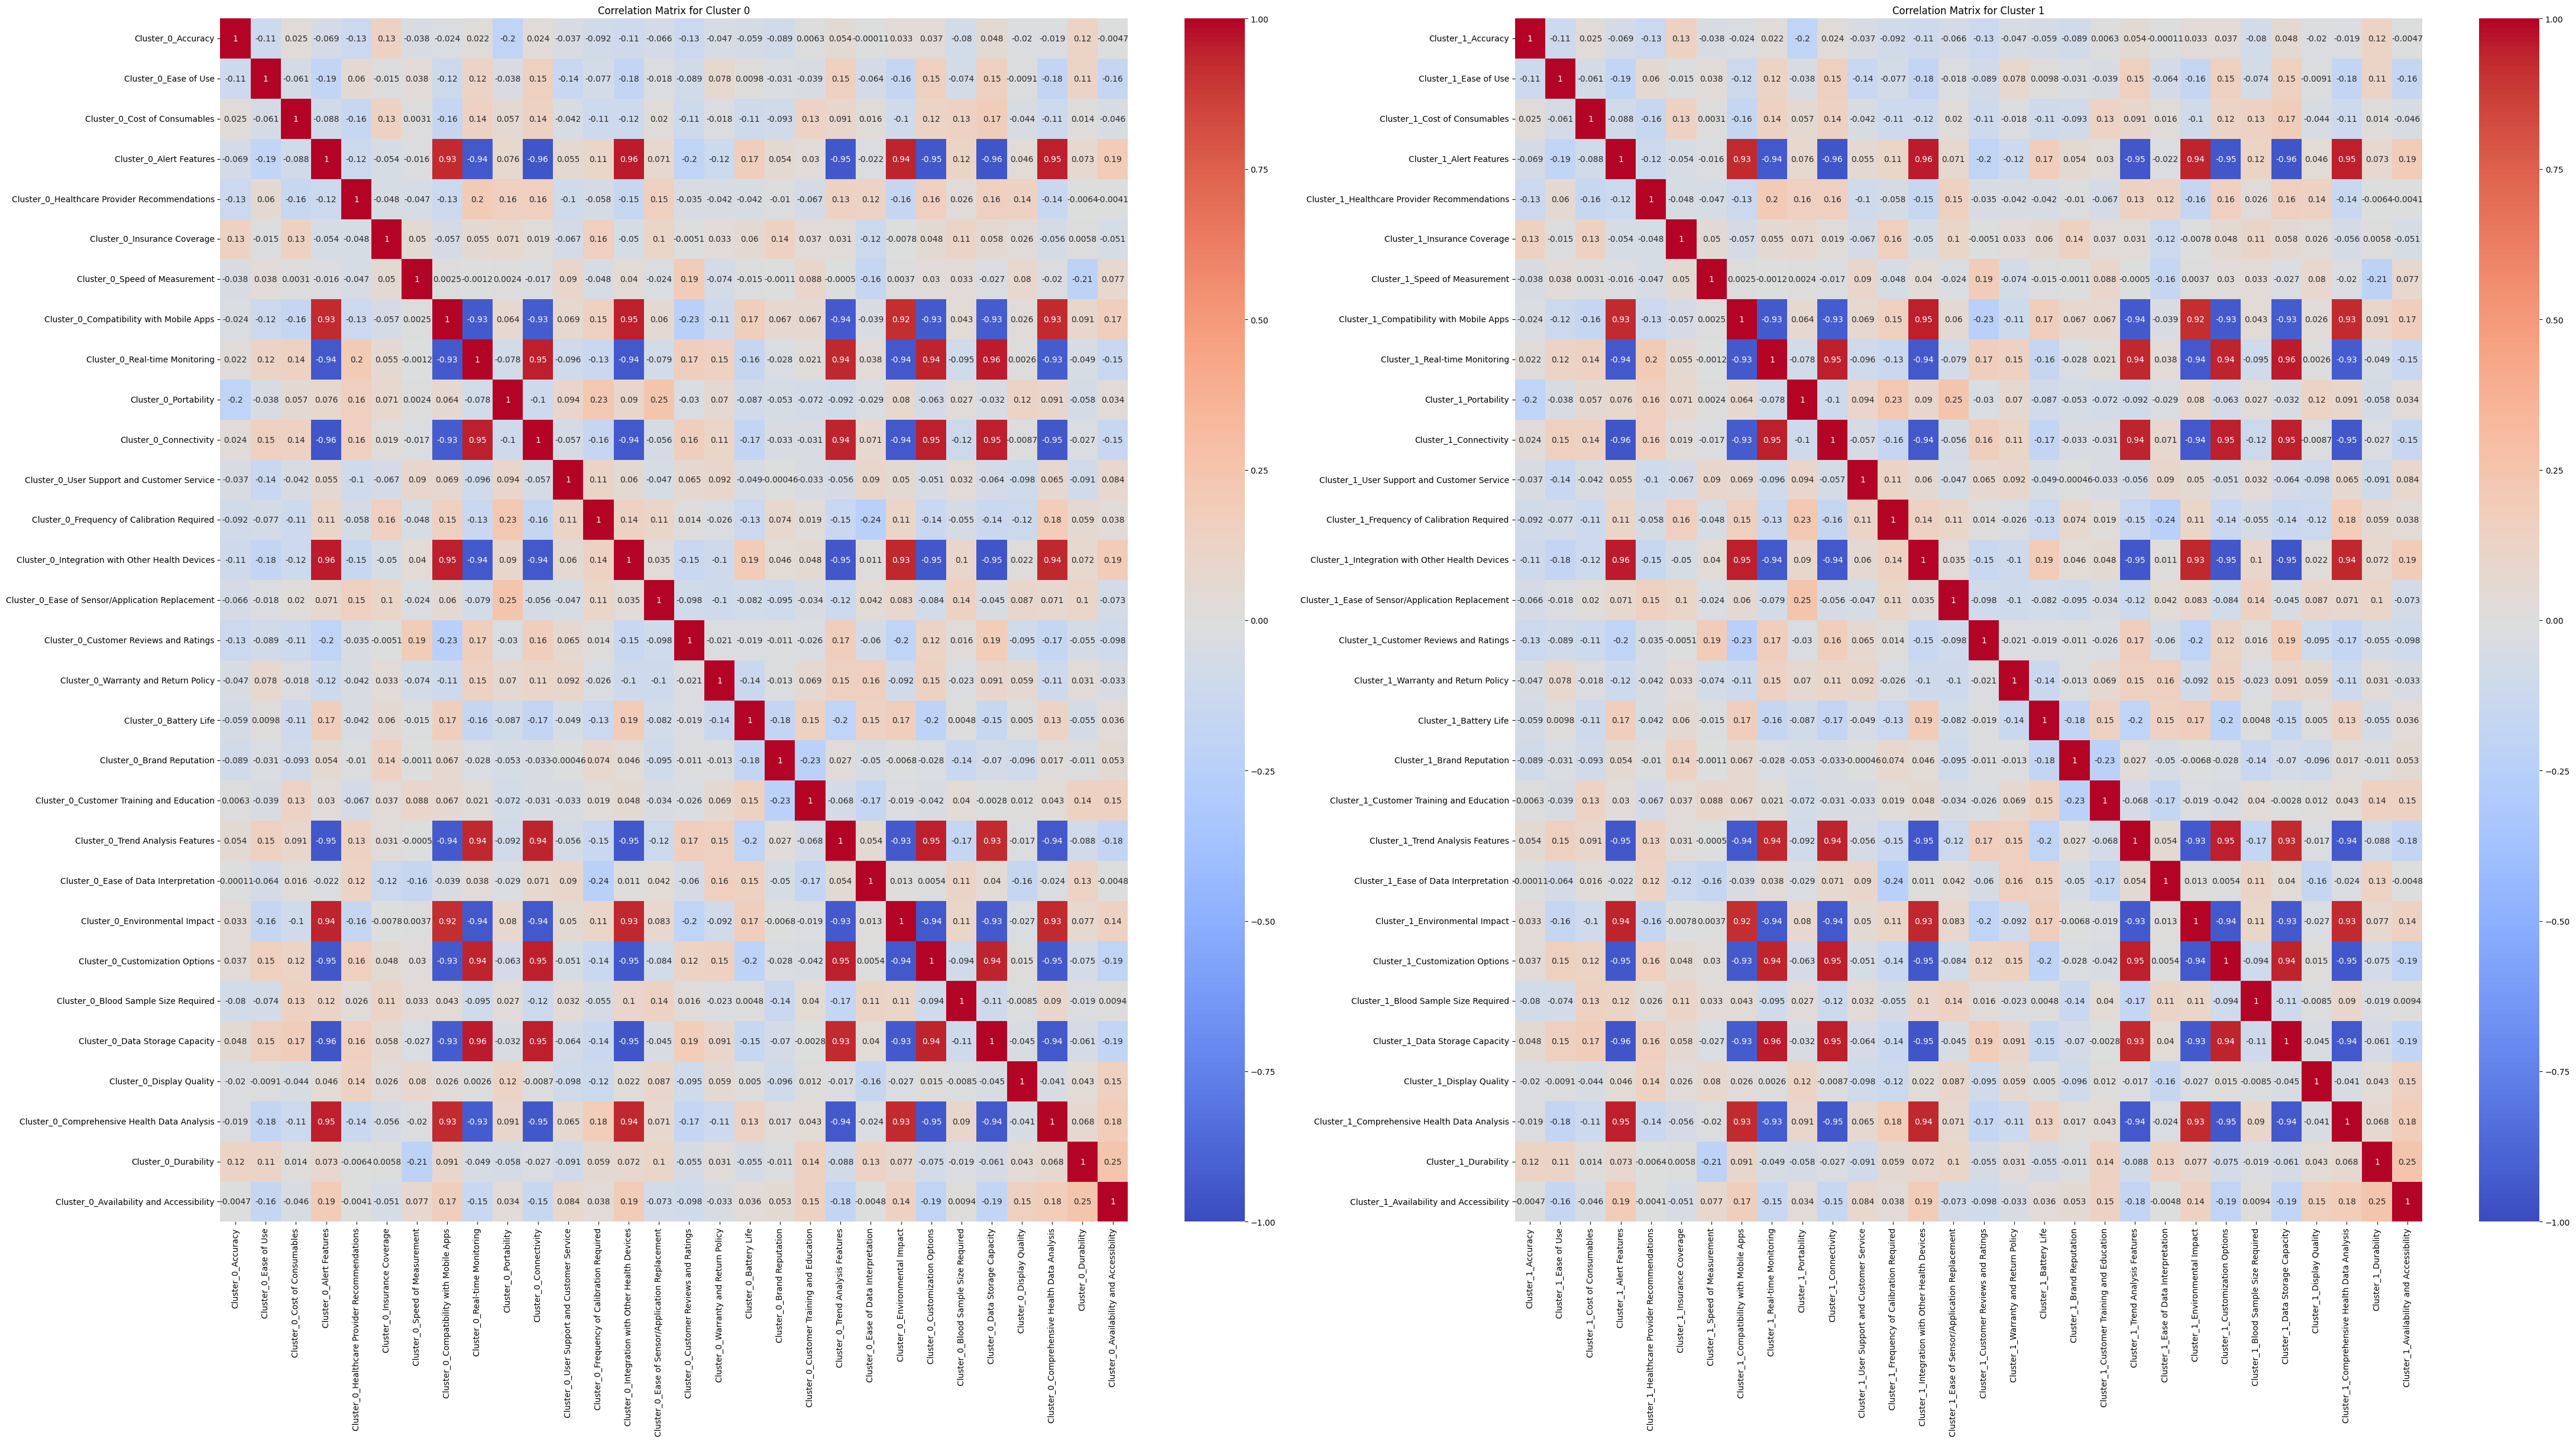

In [63]:
cluster_0_columns = [col for col in product_data.columns if 'Cluster_0' in col]
cluster_1_columns = [col for col in product_data.columns if 'Cluster_1' in col]

# Compute correlation matrices for each cluster
corr_cluster_0 = product_data[cluster_0_columns].corr()
corr_cluster_1 = product_data[cluster_1_columns].corr()


# Plotting the heatmaps
plt.figure(figsize=(45, 45))

plt.subplot(2, 2, 1)
sns.heatmap(corr_cluster_0, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Cluster 0')

plt.subplot(2, 2, 2)
sns.heatmap(corr_cluster_1, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Cluster 1')


plt.tight_layout()
plt.show()

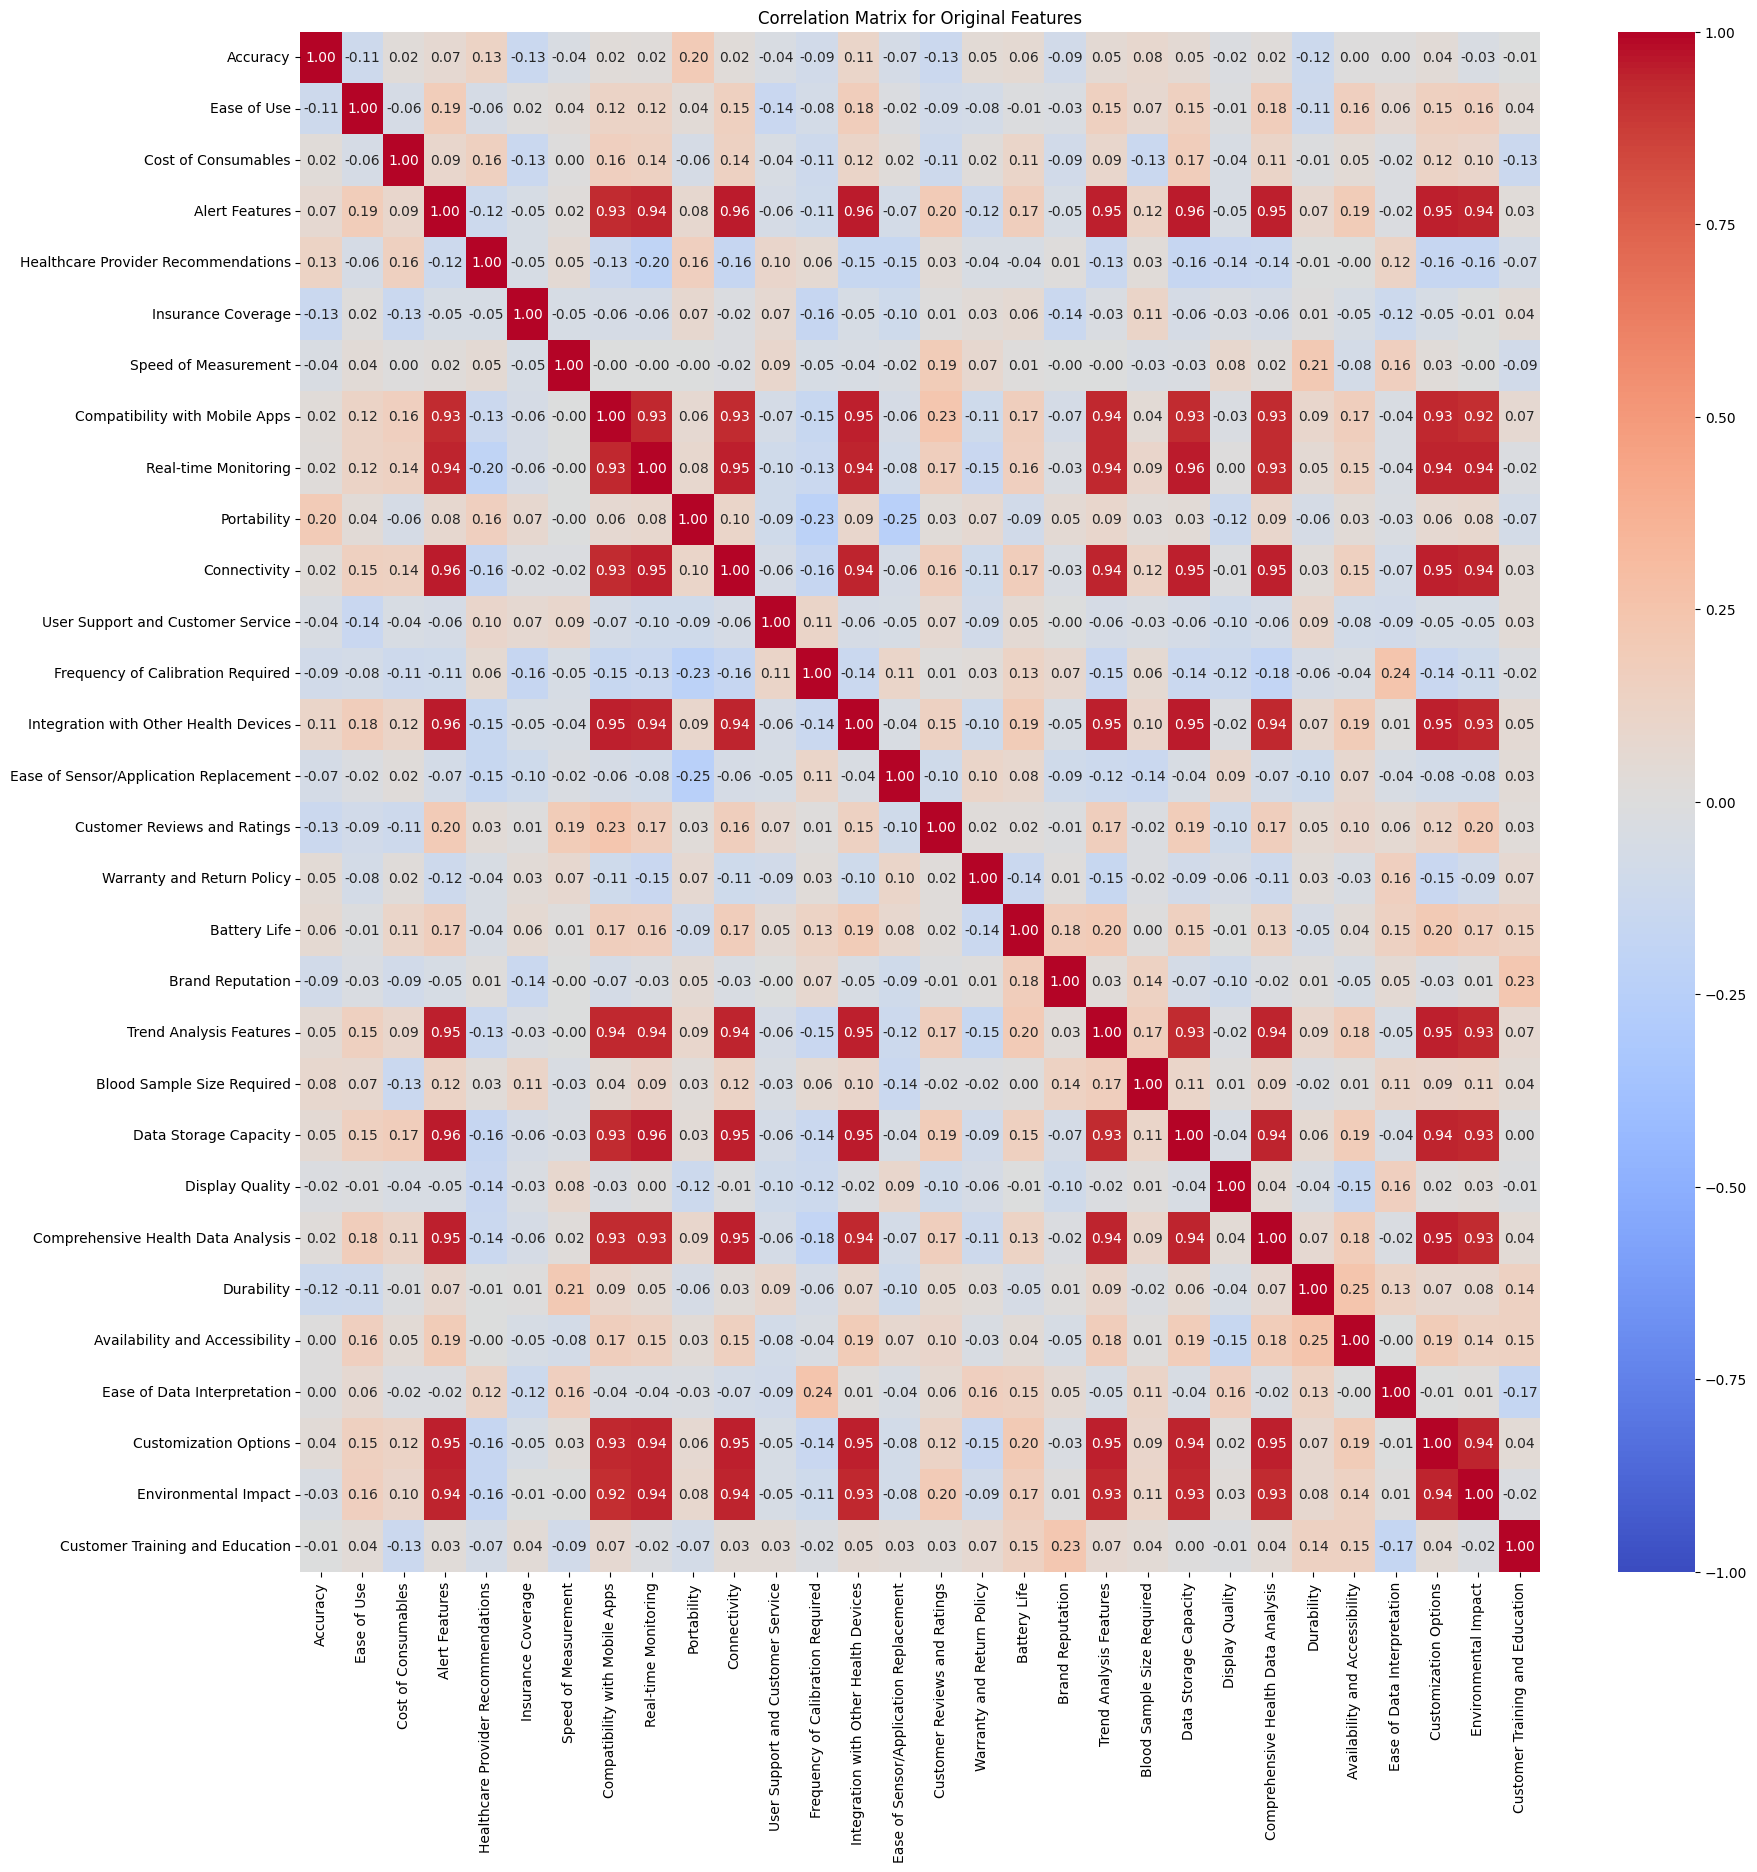

In [64]:
original_features = product_data.columns[2:32]  # 根据您的数据调整

# 计算这些特征的相关性矩阵
corr_matrix = product_data[original_features].corr()

# 绘制相关性热图
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Original Features')
plt.show()


In [72]:

# 定义原始特征和加权后的特征
original_features = product_data.columns[2:32]
cluster_0_columns = [col for col in product_data.columns if 'Cluster_0' in col]

# 假设 original_features 和 cluster_0_columns 的顺序是一致的，即 original_features[i] 对应 cluster_0_columns[i]
# 创建一个空的列表来存储筛选后的测试结果
results_list = []

# 遍历所有可能的特征对
for i in range(len(original_features)):
    for j in range(i+1, len(original_features)):
        # 获取原始特征和加权特征对
        orig_feature1 = original_features[i]
        orig_feature2 = original_features[j]
        weighted_feature1 = cluster_0_columns[i]
        weighted_feature2 = cluster_0_columns[j]

        # 计算原始数据的斯皮尔曼秩相关系数
        orig_corr, _ = stats.spearmanr(product_data[orig_feature1], product_data[orig_feature2])

        # 计算加权数据的斯皮尔曼秩相关系数
        weight_corr, _ = stats.spearmanr(product_data[weighted_feature1], product_data[weighted_feature2])

        # 计算相关系数的差异
        spearman_diff = abs(orig_corr - weight_corr)

        # 筛选出相关系数变化大于0.5的特征对
        if spearman_diff > 0.8:
            # 对变化大的特征对进行显著性测试
            _, orig_p_value = stats.spearmanr(product_data[orig_feature1], product_data[orig_feature2])
            _, weight_p_value = stats.spearmanr(product_data[weighted_feature1], product_data[weighted_feature2])

            # 如果相关性变化在统计上显著，保留这些特征对
            if orig_p_value < 0.05 and weight_p_value < 0.05:
                results_list.append({
                    'Feature 1': orig_feature1,
                    'Feature 2': orig_feature2,
                    'Original Spearman Coeff': orig_corr,
                    'Weighted Spearman Coeff': weight_corr,
                    'Spearman Diff': spearman_diff,
                    'p_value': min(orig_p_value, weight_p_value),
                    'Significant': True
                })

# 将列表转换为DataFrame
results = pd.DataFrame(results_list)

# 查看结果
results


,Feature 1,Feature 2,Original Spearman Coeff,Weighted Spearman Coeff,Spearman Diff,p_value,Significant
0,Alert Features,Real-time Monitoring,0.862148,-0.862148,1.724297,1.071642e-30,True
1,Alert Features,Connectivity,0.898703,-0.898703,1.797406,7.399363e-37,True
2,Alert Features,Comprehensive Health Data Analysis,0.881804,-0.876957,1.758761,9.340060e-34,True
3,Alert Features,Availability and Accessibility,0.200900,-0.903804,1.104703,6.674649e-38,True
4,Compatibility with Mobile Apps,Real-time Monitoring,0.850854,-0.850854,1.701709,3.818485e-29,True
5,Compatibility with Mobile Apps,Connectivity,0.823806,-0.823806,1.647612,6.743055e-26,True
6,Compatibility with Mobile Apps,Comprehensive Health Data Analysis,0.834800,-0.851549,1.686349,3.091665e-29,True
7,Real-time Monitoring,Integration with Other Health Devices,0.864415,-0.864415,1.728830,5.035201e-31,True
8,Real-time Monitoring,Customization Options,0.867156,-0.832908,1.700064,1.982988e-31,True
9,Connectivity,Integration with Other Health Devices,0.848054,-0.848054,1.696107,8.850277e-29,True


In [73]:
results.to_csv('/content/results.csv', index=False)
files.download('results.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [76]:
threshold = 0.4  # 设置删除特征的阈值
data = product_data.drop(columns=[col for col in product_data.columns if (product_data[col] == 0).mean() > threshold])
data

,Brand,Model,Accuracy,Ease of Use,Cost of Consumables,Healthcare Provider Recommendations,Insurance Coverage,Speed of Measurement,Portability,User Support and Customer Service,...,Cluster_1_Battery Life,Cluster_1_Brand Reputation,Cluster_1_Customer Training and Education,Cluster_1_Ease of Data Interpretation,Cluster_1_Blood Sample Size Required,Cluster_1_Display Quality,Cluster_1_Durability,Cluster_1_Availability and Accessibility,Overall Average Score,Product Average Score
0,OneTouch,Verio Flex,8,9,6,6,8,10,9,6,...,0.276214,-0.486413,0.215002,10.007496,0.252442,-0.169967,0.136076,0.060153,9.354839,9.354839
1,OneTouch,Verio Flex,8,10,6,8,8,10,9,8,...,0.322250,-0.378321,0.215002,8.005997,0.280491,-0.152971,0.170096,0.060153,8.612903,8.612903
2,Abbott,Freestyle Libre 2,7,8,10,9,10,9,9,7,...,0.460357,-0.432367,0.238891,7.005247,0.280491,-0.169967,0.170096,0.054137,8.225806,8.225806
3,iHealth,Smart,10,9,6,7,10,8,8,10,...,0.460357,-0.432367,0.215002,9.006746,0.252442,-0.118977,0.170096,0.060153,8.548387,8.548387
4,iHealth,Smart,9,8,7,10,10,7,10,10,...,0.322250,-0.486413,0.238891,10.007496,0.280491,-0.101980,0.136076,0.042107,8.477097,8.477097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Medtronic,Guardian Connect,6,6,9,9,8,6,7,7,...,0.368285,-0.540459,0.143334,9.006746,0.280491,-0.101980,0.153086,0.036092,4.839032,4.839032
96,Nova Biomedical,Nova Max Plus,9,6,7,9,8,10,10,9,...,0.322250,-0.432367,0.143334,9.006746,0.196344,-0.101980,0.102057,0.036092,5.000323,5.000323
97,AgaMatrix,Jazz Wireless 2,7,10,7,6,6,6,9,7,...,0.276214,-0.486413,0.238891,6.004498,0.224393,-0.118977,0.136076,0.042107,4.839032,4.839032
98,Roche,Accu-Chek Guide,6,6,8,9,8,6,7,10,...,0.276214,-0.378321,0.238891,6.004498,0.196344,-0.101980,0.102057,0.048122,4.809032,4.809032


In [77]:
data.to_csv('/content/data.csv', index=False)
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

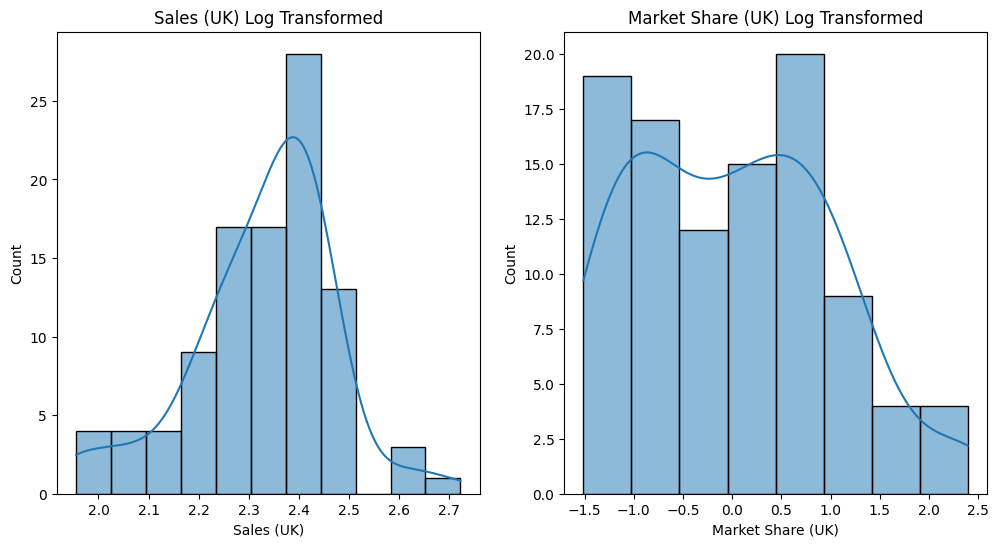

In [79]:

data['Sales (UK)'] = np.log1p(data['Sales (UK)'])
power_transformer = PowerTransformer(method='yeo-johnson')
data['Market Share (UK)'] = power_transformer.fit_transform(data['Market Share (UK)'].values.reshape(-1, 1))

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.histplot(data['Sales (UK)'], kde=True)
plt.title('Sales (UK) Log Transformed')

plt.subplot(1, 2, 2)
sns.histplot(data['Market Share (UK)'], kde=True)
plt.title('Market Share (UK) Log Transformed')

plt.show()

In [82]:
# 定义特征和目标变量
X = data.drop(columns=['Brand', 'Model', 'Market Share (UK)'])
y = data['Market Share (UK)']

# 划分数据集：70% 训练集，15% 验证集，15% 测试集
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [85]:

# 训练随机森林模型
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
rf_val_mse = mean_squared_error(y_val, y_val_pred)
rf_val_rmse = rf_val_mse ** 0.5
rf_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
rf_val_r2 = r2_score(y_val, y_val_pred)
rf_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"Validation MSE: {rf_val_mse}")
print(f"Validation RMSE: {rf_val_rmse}")
print(f"Validation MAPE: {rf_val_mape}")
print(f"Validation R²: {rf_val_r2}")
print(f"Validation MRE: {rf_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
rf_test_mse = mean_squared_error(y_test, y_test_pred)
rf_test_rmse = rf_test_mse ** 0.5
rf_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
rf_test_r2 = r2_score(y_test, y_test_pred)
rf_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"Test MSE: {rf_test_mse}")
print(f"Test RMSE: {rf_test_rmse}")
print(f"Test MAPE: {rf_test_mape}")
print(f"Test R²: {rf_test_r2}")
print(f"Test MRE: {rf_test_mre}")

Validation MSE: 0.003566759408346804
Validation RMSE: 0.05972235266922096
Validation MAPE: 0.11295234614741628
Validation R²: 0.9952660046974965
Validation MRE: 0.03353267376508663
Test MSE: 0.02252579695631811
Test RMSE: 0.1500859652209963
Test MAPE: 0.12871706184312495
Test R²: 0.9835665874532016
Test MRE: 0.0803382531034965


In [86]:

# 训练Gradient Boosting Regression模型
model = GradientBoostingRegressor(random_state=42)
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
xg_val_mse = mean_squared_error(y_val, y_val_pred)
xg_val_rmse = xg_val_mse ** 0.5
xg_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
xg_val_r2 = r2_score(y_val, y_val_pred)
xg_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"Validation MSE: {xg_val_mse}")
print(f"Validation RMSE: {xg_val_rmse}")
print(f"Validation MAPE: {xg_val_mape}")
print(f"Validation R²: {xg_val_r2}")
print(f"Validation MRE: {xg_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
xg_test_mse = mean_squared_error(y_test, y_test_pred)
xg_test_rmse = xg_test_mse ** 0.5
xg_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
xg_test_r2 = r2_score(y_test, y_test_pred)
xg_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"Test MSE: {xg_test_mse}")
print(f"Test RMSE: {xg_test_rmse}")
print(f"Test MAPE: {xg_test_mape}")
print(f"Test R²: {xg_test_r2}")
print(f"Test MRE: {xg_test_mre}")

Validation MSE: 0.011093241494742575
Validation RMSE: 0.10532445819819143
Validation MAPE: 0.07178962436141982
Validation R²: 0.9852764520638109
Validation MRE: 0.06331376806543512
Test MSE: 0.03367148399689058
Test RMSE: 0.1834979127861965
Test MAPE: 0.0891856529988767
Test R²: 0.975435391313486
Test MRE: 0.06592459606201523


In [87]:

# 训练Lasso回归模型
model = Lasso(random_state=42)
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
lasso_val_mse = mean_squared_error(y_val, y_val_pred)
lasso_val_rmse = lasso_val_mse ** 0.5
lasso_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
lasso_val_r2 = r2_score(y_val, y_val_pred)
lasso_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"Lasso Validation MSE: {lasso_val_mse}")
print(f"Lasso Validation RMSE: {lasso_val_rmse}")
print(f"Lasso Validation MAPE: {lasso_val_mape}")
print(f"Lasso Validation R²: {lasso_val_r2}")
print(f"Lasso Validation MRE: {lasso_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
lasso_test_mse = mean_squared_error(y_test, y_test_pred)
lasso_test_rmse = lasso_test_mse ** 0.5
lasso_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
lasso_test_r2 = r2_score(y_test, y_test_pred)
lasso_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"Lasso Test MSE: {lasso_test_mse}")
print(f"Lasso Test RMSE: {lasso_test_rmse}")
print(f"Lasso Test MAPE: {lasso_test_mape}")
print(f"Lasso Test R²: {lasso_test_r2}")
print(f"Lasso Test MRE: {lasso_test_mre}")

Lasso Validation MSE: 0.5600278249167825
Lasso Validation RMSE: 0.7483500684283944
Lasso Validation MAPE: 0.8373858678298941
Lasso Validation R²: 0.2567008903871939
Lasso Validation MRE: 0.17417959650021744
Lasso Test MSE: 1.1950959237053131
Lasso Test RMSE: 1.093204429054929
Lasso Test MAPE: 0.7977220309691744
Lasso Test R²: 0.12813276327886258
Lasso Test MRE: 0.1358793285585356


In [88]:

# 训练Ridge回归模型
model = Ridge(random_state=42)
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
ridge_val_mse = mean_squared_error(y_val, y_val_pred)
ridge_val_rmse = ridge_val_mse ** 0.5
ridge_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
ridge_val_r2 = r2_score(y_val, y_val_pred)
ridge_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"Ridge Validation MSE: {ridge_val_mse}")
print(f"Ridge Validation RMSE: {ridge_val_rmse}")
print(f"Ridge Validation MAPE: {ridge_val_mape}")
print(f"Ridge Validation R²: {ridge_val_r2}")
print(f"Ridge Validation MRE: {ridge_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
ridge_test_mse = mean_squared_error(y_test, y_test_pred)
ridge_test_rmse = ridge_test_mse ** 0.5
ridge_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
ridge_test_r2 = r2_score(y_test, y_test_pred)
ridge_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"Ridge Test MSE: {ridge_test_mse}")
print(f"Ridge Test RMSE: {ridge_test_rmse}")
print(f"Ridge Test MAPE: {ridge_test_mape}")
print(f"Ridge Test R²: {ridge_test_r2}")
print(f"Ridge Test MRE: {ridge_test_mre}")

Ridge Validation MSE: 0.0758522051193664
Ridge Validation RMSE: 0.2754127904062671
Ridge Validation MAPE: 0.747759416074129
Ridge Validation R²: 0.8993248656247198
Ridge Validation MRE: 0.44681227045024036
Ridge Test MSE: 0.11297140460955225
Ridge Test RMSE: 0.3361121905101811
Ridge Test MAPE: 0.3831149195857237
Ridge Test R²: 0.9175831291767312
Ridge Test MRE: 0.2720610814063049


In [89]:

# 训练SVR模型
model = SVR()
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
svr_val_mse = mean_squared_error(y_val, y_val_pred)
svr_val_rmse = svr_val_mse ** 0.5
svr_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
svr_val_r2 = r2_score(y_val, y_val_pred)
svr_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"SVR Validation MSE: {svr_val_mse}")
print(f"SVR Validation RMSE: {svr_val_rmse}")
print(f"SVR Validation MAPE: {svr_val_mape}")
print(f"SVR Validation R²: {svr_val_r2}")
print(f"SVR Validation MRE: {svr_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
svr_test_mse = mean_squared_error(y_test, y_test_pred)
svr_test_rmse = svr_test_mse ** 0.5
svr_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
svr_test_r2 = r2_score(y_test, y_test_pred)
svr_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"SVR Test MSE: {svr_test_mse}")
print(f"SVR Test RMSE: {svr_test_rmse}")
print(f"SVR Test MAPE: {svr_test_mape}")
print(f"SVR Test R²: {svr_test_r2}")
print(f"SVR Test MRE: {svr_test_mre}")

SVR Validation MSE: 0.6134005518435787
SVR Validation RMSE: 0.7831989222691631
SVR Validation MAPE: 1.1013520288910674
SVR Validation R²: 0.18586173090759128
SVR Validation MRE: 0.36885784020581014
SVR Test MSE: 1.3962463711917923
SVR Test RMSE: 1.181628694299437
SVR Test MAPE: 0.861712020146748
SVR Test R²: -0.018614021926055546
SVR Test MRE: 0.20396571664890026


In [90]:

# 训练Elastic Net回归模型
model = ElasticNet(random_state=42)
model.fit(X_train, y_train)

# 在验证集上进行预测
y_val_pred = model.predict(X_val)

# 计算各项指标
elasticnet_val_mse = mean_squared_error(y_val, y_val_pred)
elasticnet_val_rmse = elasticnet_val_mse ** 0.5
elasticnet_val_mape = mean_absolute_percentage_error(y_val, y_val_pred)
elasticnet_val_r2 = r2_score(y_val, y_val_pred)
elasticnet_val_mre = (abs(y_val - y_val_pred) / y_val).mean()

# 输出验证集的结果
print(f"ElasticNet Validation MSE: {elasticnet_val_mse}")
print(f"ElasticNet Validation RMSE: {elasticnet_val_rmse}")
print(f"ElasticNet Validation MAPE: {elasticnet_val_mape}")
print(f"ElasticNet Validation R²: {elasticnet_val_r2}")
print(f"ElasticNet Validation MRE: {elasticnet_val_mre}")

# 在测试集上进行预测
y_test_pred = model.predict(X_test)

# 计算各项指标
elasticnet_test_mse = mean_squared_error(y_test, y_test_pred)
elasticnet_test_rmse = elasticnet_test_mse ** 0.5
elasticnet_test_mape = mean_absolute_percentage_error(y_test, y_test_pred)
elasticnet_test_r2 = r2_score(y_test, y_test_pred)
elasticnet_test_mre = (abs(y_test - y_test_pred) / y_test).mean()

# 输出测试集的结果
print(f"ElasticNet Test MSE: {elasticnet_test_mse}")
print(f"ElasticNet Test RMSE: {elasticnet_test_rmse}")
print(f"ElasticNet Test MAPE: {elasticnet_test_mape}")
print(f"ElasticNet Test R²: {elasticnet_test_r2}")
print(f"ElasticNet Test MRE: {elasticnet_test_mre}")

ElasticNet Validation MSE: 0.25603736886511325
ElasticNet Validation RMSE: 0.5060013526317032
ElasticNet Validation MAPE: 0.6609559142271066
ElasticNet Validation R²: 0.6601734059672414
ElasticNet Validation MRE: 0.07738383223879162
ElasticNet Test MSE: 0.5754658455953722
ElasticNet Test RMSE: 0.7585946517049618
ElasticNet Test MAPE: 0.5629752874161461
ElasticNet Test R²: 0.5801761124989442
ElasticNet Test MRE: 0.1433990412100424


In [91]:

# 创建结果字典，将之前计算的变量名替换为它们的实际值
results_data = {
    'Metric': [
        'Validation MSE', 'Validation RMSE', 'Validation MAPE', 'Validation R²', 'Validation MRE',
        'Test MSE', 'Test RMSE', 'Test MAPE', 'Test R²', 'Test MRE'
    ],
    'Random Forest': [
        rf_val_mse, rf_val_rmse, rf_val_mape, rf_val_r2, rf_val_mre,
        rf_test_mse, rf_test_rmse, rf_test_mape, rf_test_r2, rf_test_mre
    ],
    'Gradient Boosting': [
        xg_val_mse, xg_val_rmse, xg_val_mape, xg_val_r2, xg_val_mre,
        xg_test_mse, xg_test_rmse, xg_test_mape, xg_test_r2, xg_test_mre
    ],
    'Lasso Regression': [
        lasso_val_mse, lasso_val_rmse, lasso_val_mape, lasso_val_r2, lasso_val_mre,
        lasso_test_mse, lasso_test_rmse, lasso_test_mape, lasso_test_r2, lasso_test_mre
    ],
    'Ridge Regression': [
        ridge_val_mse, ridge_val_rmse, ridge_val_mape, ridge_val_r2, ridge_val_mre,
        ridge_test_mse, ridge_test_rmse, ridge_test_mape, ridge_test_r2, ridge_test_mre
    ],
    'Support Vector Regression': [
        svr_val_mse, svr_val_rmse, svr_val_mape, svr_val_r2, svr_val_mre,
        svr_test_mse, svr_test_rmse, svr_test_mape, svr_test_r2, svr_test_mre
    ],
    'Elastic Net Regression': [
        elasticnet_val_mse, elasticnet_val_rmse, elasticnet_val_mape, elasticnet_val_r2, elasticnet_val_mre,
        elasticnet_test_mse, elasticnet_test_rmse, elasticnet_test_mape, elasticnet_test_r2, elasticnet_test_mre
    ]
}

# 创建 DataFrame
results_df = pd.DataFrame(results_data)

# 设置 'Metric' 为索引
results_df.set_index('Metric', inplace=True)

# 显示 DataFrame
results_df


,Random Forest,Gradient Boosting,Lasso Regression,Ridge Regression,Support Vector Regression,Elastic Net Regression
Metric,,,,,,
Validation MSE,0.003567,0.011093,0.560028,0.075852,0.613401,0.256037
Validation RMSE,0.059722,0.105324,0.748350,0.275413,0.783199,0.506001
Validation MAPE,0.112952,0.071790,0.837386,0.747759,1.101352,0.660956
Validation R²,0.995266,0.985276,0.256701,0.899325,0.185862,0.660173
Validation MRE,0.033533,0.063314,0.174180,0.446812,0.368858,0.077384
Test MSE,0.022526,0.033671,1.195096,0.112971,1.396246,0.575466
Test RMSE,0.150086,0.183498,1.093204,0.336112,1.181629,0.758595
Test MAPE,0.128717,0.089186,0.797722,0.383115,0.861712,0.562975
Test R²,0.983567,0.975435,0.128133,0.917583,-0.018614,0.580176


In [95]:
results_df.to_csv('/content/results_df.csv', index=False)
files.download('results_df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

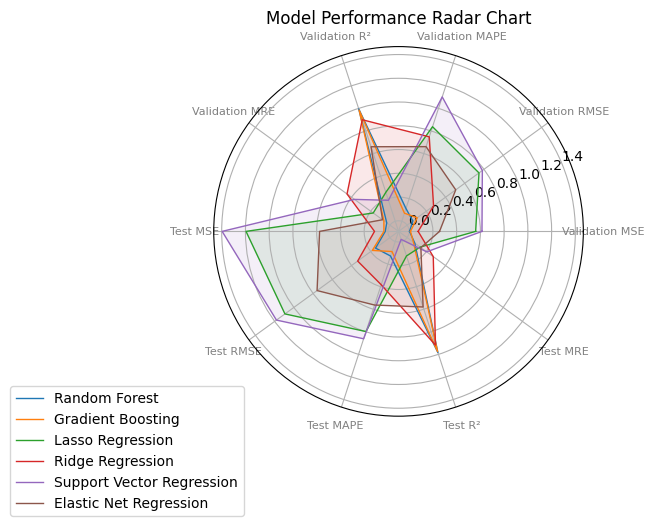

In [92]:

categories = list(results_df.index)
N = len(categories)

for model in results_df.columns:
    values = results_df[model].values.flatten().tolist()
    values += values[:1]
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    ax = plt.subplot(111, polar=True)
    plt.xticks(angles[:-1], categories, color='grey', size=8)
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=model)
    ax.fill(angles, values, alpha=0.1)

plt.title('Model Performance Radar Chart')
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.show()


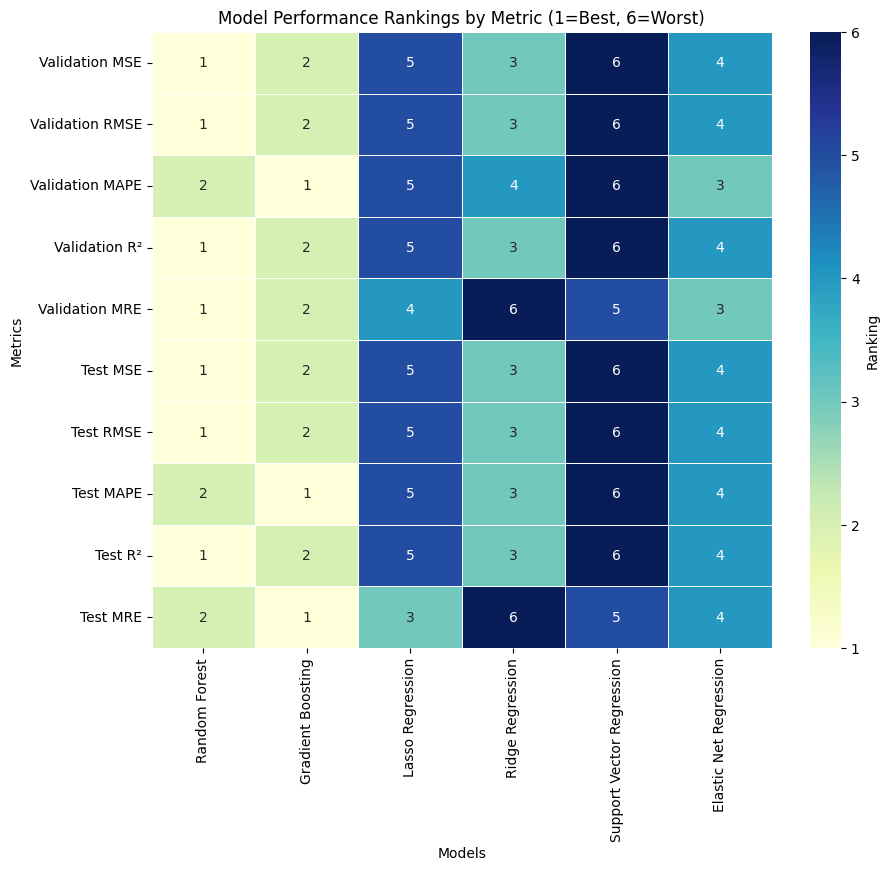

In [93]:
# Transpose DataFrame to rank models by each metric
transposed_df = results_df.T

# Define metrics for which higher is better
higher_better_metrics = ['Validation R²', 'Test R²']

# Calculate rankings with adjusted logic
ranking_df = transposed_df.apply(lambda x: x.rank(method='min', ascending=not x.name in higher_better_metrics), axis=0)

# Transpose back to original orientation
ranking_df = ranking_df.T

# Plotting the heatmap with the adjusted ranking data
plt.figure(figsize=(10, 8))
sns.heatmap(ranking_df, annot=True, cmap="YlGnBu", linewidths=.5, cbar_kws={'label': 'Ranking'})
plt.title('Model Performance Rankings by Metric (1=Best, 6=Worst)')
plt.xlabel('Models')
plt.ylabel('Metrics')
plt.show()


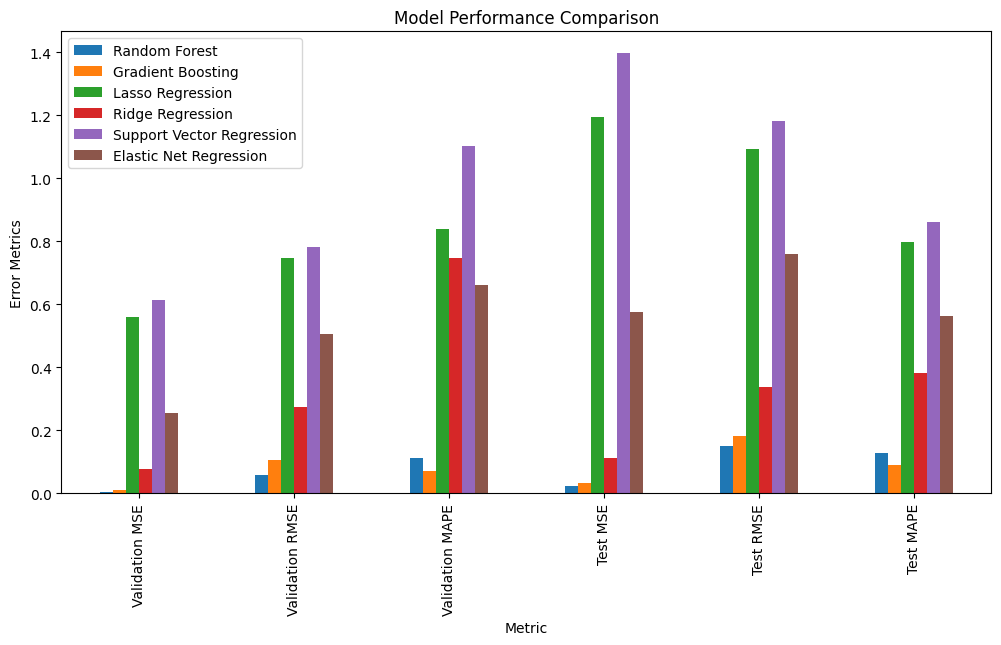

In [94]:

metrics = ['Validation MSE', 'Validation RMSE', 'Validation MAPE',
           'Test MSE', 'Test RMSE', 'Test MAPE']

results_df.loc[metrics].plot(kind='bar', figsize=(12, 6))
plt.title('Model Performance Comparison')
plt.ylabel('Error Metrics')
plt.show()


In [99]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Perform 5-fold cross-validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
rf_cv_mse = -rf_cv_scores

# Calculate mean and standard deviation of the cross-validated MSE
print(f'Random Forest CV MSE: {np.mean(rf_cv_mse):.4f} ± {np.std(rf_cv_mse):.4f}')

Random Forest CV MSE: 0.0165 ± 0.0084


In [100]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)

# Perform 5-fold cross-validation
gb_cv_scores = cross_val_score(gb_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive
gb_cv_mse = -gb_cv_scores

# Calculate mean and standard deviation of the cross-validated MSE
print(f'Gradient Boosting CV MSE: {np.mean(gb_cv_mse):.4f} ± {np.std(gb_cv_mse):.4f}')

Gradient Boosting CV MSE: 0.0130 ± 0.0084


In [101]:
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# 初始化随机森林模型
rf_model = RandomForestRegressor(random_state=42)

# 使用GridSearchCV进行超参数调优
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf,
                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# 拟合模型
grid_search_rf.fit(X_train, y_train)

# 输出最佳参数组合和对应的最佳MSE
print(f'Best Parameters for Random Forest: {grid_search_rf.best_params_}')

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters for Random Forest: {'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validated MSE: 0.0165


In [103]:
best_rf_model = RandomForestRegressor(
    bootstrap=True,
    max_depth=None,
    min_samples_leaf=1,
    min_samples_split=2,
    n_estimators=100,
    random_state=42
)

# 在整个训练集上拟合模型
best_rf_model.fit(X_train, y_train)

# 使用模型预测测试集
y_pred = best_rf_model.predict(X_test)

# 计算MSE
mse = mean_squared_error(y_test, y_pred)
# 计算RMSE
rmse = mse ** 0.5
# 计算MAPE
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
# 计算R²
r2 = r2_score(y_test, y_pred)

print(f'Test MSE: {mse:.4f}')
print(f'Test RMSE: {rmse:.4f}')
print(f'Test MAPE: {mape:.4f}%')
print(f'Test R²: {r2:.4f}')

Test MSE: 0.0225
Test RMSE: 0.1501
Test MAPE: 12.8717%
Test R²: 0.9836


In [102]:
param_grid_gb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0]
}

# 初始化梯度提升模型
gb_model = GradientBoostingRegressor(random_state=42)

# 使用GridSearchCV进行超参数调优
grid_search_gb = GridSearchCV(estimator=gb_model, param_grid=param_grid_gb,
                              cv=5, n_jobs=-1, scoring='neg_mean_squared_error', verbose=2)

# 拟合模型
grid_search_gb.fit(X_train, y_train)

# 输出最佳参数组合和对应的最佳MSE
print(f'Best Parameters for Gradient Boosting: {grid_search_gb.best_params_}')

Fitting 5 folds for each of 729 candidates, totalling 3645 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 200, 'subsample': 0.9}
Best Cross-Validated MSE: 0.0053


In [105]:
best_gb_model = GradientBoostingRegressor(
    learning_rate=0.1,
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=10,
    n_estimators=200,
    subsample=0.9,
    random_state=42
)

# 在整个训练集上拟合模型
best_gb_model.fit(X_train, y_train)

y_pred_gb = best_gb_model.predict(X_test)

# 计算MSE
mse_gb = mean_squared_error(y_test, y_pred_gb)
# 计算RMSE
rmse_gb = mse_gb ** 0.5
# 计算MAPE
mape_gb = np.mean(np.abs((y_test - y_pred_gb) / y_test)) * 100
# 计算R²
r2_gb = r2_score(y_test, y_pred_gb)

print(f'Test MSE: {mse_gb:.4f}')
print(f'Test RMSE: {rmse_gb:.4f}')
print(f'Test MAPE: {mape_gb:.4f}%')
print(f'Test R²: {r2_gb:.4f}')

Test MSE: 0.0035
Test RMSE: 0.0593
Test MAPE: 4.4202%
Test R²: 0.9974


In [112]:
# 定义基础模型
estimators = [
    ('rf', best_rf_model),
    ('gb', best_gb_model)
]

#定义堆叠模型，使用线性回归作为元学习器
stacking_model = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),
    cv=5  # 使用5折交叉验证
)

# 拟合堆叠模型
stacking_model.fit(X_train, y_train)

# 在测试集上进行预测
stacking_preds = stacking_model.predict(X_test)

# 评估堆叠模型的性能
mse_stacking = mean_squared_error(y_test, stacking_preds)
rmse_stacking = mse_stacking ** 0.5
mape_stacking = np.mean(np.abs((y_test - stacking_preds) / y_test)) * 100
r2_stacking = r2_score(y_test, stacking_preds)

print(f'Stacking Test MSE: {mse_stacking:.4f}')
print(f'Stacking Test RMSE: {rmse_stacking:.4f}')
print(f'Stacking Test MAPE: {mape_stacking:.4f}%')
print(f'Stacking Test R²: {r2_stacking:.4f}')

Stacking Test MSE: 0.0039
Stacking Test RMSE: 0.0622
Stacking Test MAPE: 5.4793%
Stacking Test R²: 0.9972


In [111]:
# 假设已经有了调优后的随机森林模型 (best_rf_model) 和梯度提升模型 (best_gb_model)

# 在测试集上进行预测
rf_preds = best_rf_model.predict(X_test)
gb_preds = best_gb_model.predict(X_test)

# 进行加权平均，假设给予随机森林和梯度提升模型相同的权重
ensemble_preds = (rf_preds * 0.3) + (gb_preds * 0.7)


# 评估加权平均后的模型性能
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# 计算加权平均后的MSE
mse_ensemble = mean_squared_error(y_test, ensemble_preds)
# 计算加权平均后的RMSE
rmse_ensemble = mse_ensemble ** 0.5
# 计算加权平均后的MAPE
mape_ensemble = np.mean(np.abs((y_test - ensemble_preds) / y_test)) * 100
# 计算加权平均后的R²
r2_ensemble = r2_score(y_test, ensemble_preds)

print(f'Ensemble Test MSE: {mse_ensemble:.4f}')
print(f'Ensemble Test RMSE: {rmse_ensemble:.4f}')
print(f'Ensemble Test MAPE: {mape_ensemble:.4f}%')
print(f'Ensemble Test R²: {r2_ensemble:.4f}')


Ensemble Test MSE: 0.0054
Ensemble Test RMSE: 0.0736
Ensemble Test MAPE: 6.3787%
Ensemble Test R²: 0.9960


In [115]:
import pandas as pd

# 创建包含各个模型调优后的指标和集成后的指标的字典
data = {
    "Model": ["Gradient Boosting", "Random Forest", "Weighted Ensemble", "Stacking Ensemble"],
    "Test MSE": [0.0035, 0.0225, 0.0054, 0.0039],
    "Test RMSE": [0.0593, 0.1501, 0.0736, 0.0622],
    "Test MAPE": [4.4202, 12.8717, 6.3787, 5.4793],
    "Test R²": [0.9974, 0.9836, 0.9960, 0.9972]
}

# 创建DataFrame
df = pd.DataFrame(data)

df

,Model,Test MSE,Test RMSE,Test MAPE,Test R²
0,Gradient Boosting,0.0035,0.0593,4.4202,0.9974
1,Random Forest,0.0225,0.1501,12.8717,0.9836
2,Weighted Ensemble,0.0054,0.0736,6.3787,0.9960
3,Stacking Ensemble,0.0039,0.0622,5.4793,0.9972


In [116]:
df.to_csv('/content/model_result.csv', index=False)
files.download('model_result.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [119]:
# 提取梯度提升模型的特征重要性
importances = best_gb_model.feature_importances_

# 假设 X_train 包含特征名称
features = X_train.columns

# 创建一个 DataFrame 来更好地展示特征重要性
feature_importances = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

# 按重要性排序
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

top_10_features = feature_importances.head(10)

# 打印出排名前10的特征
print(top_10_features)


                                      Feature    Importance
21                                 Sales (UK)  9.750419e-01
63                      Product Average Score  2.228262e-02
62                      Overall Average Score  2.654551e-03
20                                 Price (UK)  6.122793e-06
16                                 Durability  2.053870e-06
60                       Cluster_1_Durability  2.005191e-06
27             Cluster_0_Speed of Measurement  9.365943e-07
13                           Brand Reputation  9.210619e-07
19            Customer Training and Education  7.218466e-07
36  Cluster_0_Customer Training and Education  6.755576e-07
